<a href="https://colab.research.google.com/github/sankalpawann/physics_simulations/blob/main/Refraction_and_Snell's_Law_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Refraction and Snell's Law Simulation**

This notebook demonstrates the principles of light refraction using Snell's Law. We'll create an animated simulation showing a light ray passing from one medium to another.

## **Theory**

### **Snell's Law**

Snell's Law describes how light bends when it passes from one medium to another. The law is given by:

\[ n_1 \sin(\theta_1) = n_2 \sin(\theta_2) \]

where:
- \( n_1 \) and \( n_2 \) are the refractive indices of the first and second mediums, respectively.
- \( \theta_1 \) is the angle of incidence.
- \( \theta_2 \) is the angle of refraction.

### **Refractive Index**

The refractive index of a medium is a measure of how much the speed of light is reduced inside the medium. For example, the refractive index of air is approximately 1, while that of glass is around 1.5.

### **Angles of Incidence and Refraction**

- **Angle of Incidence (\( \theta_1 \))**: The angle between the incident ray and the normal (perpendicular) to the surface at the point of incidence.
- **Angle of Refraction (\( \theta_2 \))**: The angle between the refracted ray and the normal to the surface at the point of refraction.

## **Simulation**

We'll use Python to simulate the refraction of light at the interface between two media and create an animation to visualize the process.

### **Import Libraries**

First, let's import the necessary libraries.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
from matplotlib.animation import FuncAnimation
import torch
from matplotlib.patches import Arc, FancyBboxPatch

In [2]:
# Ensure that PyTorch uses GPU if available
print(torch.cuda.is_available())
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

False


### **Snell's Law Function**

Next, we define a function to compute the angle of refraction using Snell's Law.


In [3]:
# Snell's Law using PyTorch tensors
def snell_law(n1, theta1, n2):
    return torch.asin((n1 / n2) * torch.sin(theta1))


### **Simulation Parameters**

We set the refractive indices of the two media and generate a range of incident angles from 0 to 90 degrees.


In [4]:
# Simulation parameters
n1 = 1.0  # Refractive index of the first medium (e.g., air)
n2 = 1.5  # Refractive index of the second medium (e.g., glass)
incident_angles = torch.linspace(0, np.pi / 2, 90).to(device)  # Incident angles from 0 to 90 degrees

# Precompute refracted angles
refracted_angles = snell_law(n1, incident_angles, n2)
# print (incident_angles*(180/np.pi))
# print (refracted_angles*(180/np.pi))

### **Create the Animation**

We create a figure and define a function to update the frame of the animation. This function draws the incident ray, the normal line, and the refracted ray for each frame.


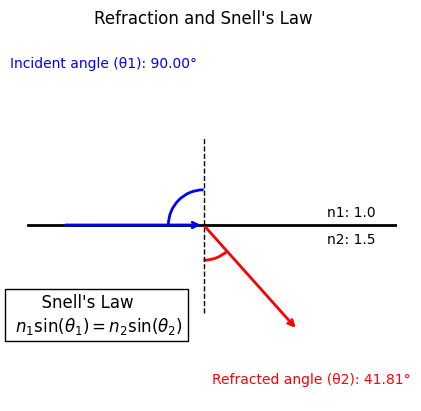

In [5]:
# Create the figure and axis
fig, ax = plt.subplots()
ax.set_xlim(-1.1, 1.1)
ax.set_ylim(-1, 1.1)
ax.set_aspect('equal')
ax.set_title("Refraction and Snell's Law")
ax.axis(False)
# Media interface line
interface_line, = ax.plot([-1, 1.1], [0, 0], 'k-', lw=2)

# Normal line
normal_line, = ax.plot([0, 0], [-0.5, 0.5], 'k--', lw=1)

# Incident wave arrow
incident_wave = ax.annotate("", xy=(0, 0), xytext=(0, 0), arrowprops=dict(facecolor='blue', edgecolor='blue', arrowstyle='->', lw=2))

# Refracted wave arrow
refracted_wave = ax.annotate("", xy=(0, 0), xytext=(0, 0), arrowprops=dict(facecolor='red', edgecolor='red', arrowstyle='<-', lw=2))


arrow_length = 0.8

# Text labels
incident_text = ax.text(-1.1, 0.9, "", color='blue')
refracted_text = ax.text(0.05, -0.9, "", color='red')
n1_text = ax.text(0.7, 0.05, f"n1: {n1}", color='black')
n2_text = ax.text(0.7, -0.1, f"n2: {n2}", color='black')
# Add equation in a box
eq_text = ax.text(-1.1, -0.6, "      Snell's Law\n $n_1 \sin(\\theta_1) = n_2 \sin(\\theta_2)$", fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))



# Highlighted arcs for angles
incident_arc = Arc((0, 0), 0.4, 0.4, angle =90, theta1=0, theta2=0, color='blue', lw=2)
refracted_arc = Arc((0, 0), 0.4, 0.4, angle =270, theta1=0, theta2=0, color='red', lw=2)
ax.add_patch(incident_arc)
ax.add_patch(refracted_arc)

# Function to update the frame
def update(frame):
    theta1 = incident_angles[frame].item()
    theta2 = refracted_angles[frame].item()

    incident_end_x = -arrow_length*np.sin(theta1)
    incident_end_y = arrow_length*np.cos(theta1)
    incident_wave.set_position((incident_end_x, incident_end_y))
    incident_wave.xy = (0, 0)

    if not np.isnan(theta2):
        refracted_end_x = arrow_length*np.sin(theta2)
        refracted_end_y = -arrow_length*np.cos(theta2)
        refracted_wave.set_position((refracted_end_x, refracted_end_y))
        refracted_wave.xy = (0, 0)
        refracted_text.set_text(f"Refracted angle (θ2): {np.degrees(theta2):.2f}°")
        refracted_arc.theta1 = 0
        refracted_arc.theta2 = np.degrees(theta2)
    else:
        refracted_wave.set_position((0, 0))
        refracted_wave.xy = (0, 0)
        refracted_text.set_text("Total internal reflection")

    incident_text.set_text(f"Incident angle (θ1): {np.degrees(theta1):.2f}°")
    incident_arc.theta1 = 0
    incident_arc.theta2 = np.degrees(theta1)
# Create the animation
ani = FuncAnimation(fig, update, frames=len(incident_angles), repeat=False)

# Save the animation as a GIF
ani.save('refraction_simulation_pytorch.gif', writer='pillow')

plt.show()
